In [2]:
from datetime import datetime, timedelta


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing Time Series Data

# Data by the hour
first_48_data = pd.read_csv('/content/drive/MyDrive/revised_first_48_by_hr.csv')
first_48_data = first_48_data.dropna(axis=1, how='all')

first_48_data.head()

,Unnamed: 0,time_since_start,measurement_datetime,person_id,visit_occurrence_id,visit_start_datetime,visit_end_datetime,ART BP Diastolic,Arterial Blood Pressure diastolic,Non Invasive Blood Pressure diastolic,...,Admission Weight,pH|Blood|Blood Gas,PH (Arterial),readmission_freq,readmission_id,readmission_time,time_between_readmission,readmission_label,death_label,length_of_stay
0,0,0 days 00:00:00.000000000,2174-05-26 04:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
1,1,0 days 01:00:00.000000000,2174-05-26 05:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
2,2,0 days 02:00:00.000000000,2174-05-26 06:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
3,3,0 days 03:00:00.000000000,2174-05-26 07:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
4,4,0 days 04:00:00.000000000,2174-05-26 08:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667


In [4]:
# Creating patient data for observed measurements like height and weight

data_rows = []

for patient, patient_rows in first_48_data.groupby('person_id'):

  new_row = []
  new_row.append(patient)

  weight_value = np.nan
  height_value = np.nan
  bmi_value = np.nan

  weight_found = False
  height_found = False

  for idx, row in patient_rows.iterrows():

    if weight_found and height_found:
      break

    if not(weight_found) and not(np.isnan(row['Admission Weight'])):
      weight_value = row['Admission Weight']
      weight_found = True
      
    
    elif not(weight_found) and not(np.isnan(row['Admission Weight (Kg)'])):
      weight_value = row['Admission Weight (Kg)']
      weight_found = True
      
  
    if not(height_found) and not(np.isnan(row['Height'])):
      height_value = row['Height']
      height_found = True
      
    
    elif not(height_found) and not(np.isnan(row['Height (cm)'])):
      height_value = row['Height (cm)']
      height_found = True
  
  # calculate bmi if both are found
  if weight_found and height_found:
    bmi_value = weight_value / ((height_value / 100)**2)





  new_row.append(weight_value)
  new_row.append(height_value)
  new_row.append(bmi_value)

  data_rows.append(new_row)

physical_data = pd.DataFrame(data_rows, columns=['person_id', 'weight', 'height', 'bmi'])
physical_data
    


,person_id,weight,height,bmi
0,-9066461348710750663,88.223644,175.26,28.722311
1,-8993675534959689080,67.600000,NaN,NaN
2,-8970844422700220177,123.000000,187.96,34.815628
3,-8928428202649726867,82.000000,NaN,NaN
4,-8891617624507360381,97.700000,NaN,NaN
...,...,...,...,...
85,8090044958540695372,77.400000,167.64,27.541377
86,8480470964666031560,76.800000,NaN,NaN
87,8527170356523164323,39.400000,152.40,16.963923
88,8692405834444096922,79.300000,NaN,NaN


In [5]:
# Importing patient demographic data

patient_data = pd.read_csv('/content/drive/MyDrive/person.csv')

patient_data.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,3589912774911670296,8507,2095,NaN,NaN,NaN,0,38003563,NaN,NaN,NaN,10009628,M,0,NaN,0,HISPANIC/LATINO,2000001408
1,-3210373572193940939,8507,2079,NaN,NaN,NaN,0,38003563,NaN,NaN,NaN,10011398,M,0,NaN,0,HISPANIC/LATINO,2000001408
2,-775517641933593374,8507,2149,NaN,NaN,NaN,8516,0,NaN,NaN,NaN,10004235,M,0,BLACK/AFRICAN AMERICAN,2000001406,NaN,0
3,-2575767131279873665,8507,2050,NaN,NaN,NaN,8516,0,NaN,NaN,NaN,10024043,M,0,BLACK/AFRICAN AMERICAN,2000001406,NaN,0
4,-8970844422700220177,8507,2114,NaN,NaN,NaN,8527,0,NaN,NaN,NaN,10038933,M,0,WHITE,2000001404,NaN,0


In [6]:
# Extract columns from patient data

demographic_data = patient_data[["person_id", "year_of_birth", "gender_source_value", "race_source_value", "ethnicity_source_value"]]
demographic_data

,person_id,year_of_birth,gender_source_value,race_source_value,ethnicity_source_value
0,3589912774911670296,2095,M,NaN,HISPANIC/LATINO
1,-3210373572193940939,2079,M,NaN,HISPANIC/LATINO
2,-775517641933593374,2149,M,BLACK/AFRICAN AMERICAN,NaN
3,-2575767131279873665,2050,M,BLACK/AFRICAN AMERICAN,NaN
4,-8970844422700220177,2114,M,WHITE,NaN
...,...,...,...,...,...
95,-7671795861352464589,2052,F,UNKNOWN,NaN
96,5734523979606454056,2069,F,UNKNOWN,NaN
97,1532249960797525190,2106,F,UNABLE TO OBTAIN,NaN
98,5894416985828315484,2055,F,UNABLE TO OBTAIN,NaN


In [7]:
# Create new column combining race and ethnnicity

race_ethnicity_column = []
for idx, row in demographic_data.iterrows():
  if type(row['race_source_value']) is float and np.isnan(row['race_source_value']):
    race_ethnicity_column.append(row['ethnicity_source_value'])
  
  else:
    race_ethnicity_column.append(row['race_source_value'])

demographic_data['race_or_ethnicity'] = race_ethnicity_column

demographic_data
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,person_id,year_of_birth,gender_source_value,race_source_value,ethnicity_source_value,race_or_ethnicity
0,3589912774911670296,2095,M,NaN,HISPANIC/LATINO,HISPANIC/LATINO
1,-3210373572193940939,2079,M,NaN,HISPANIC/LATINO,HISPANIC/LATINO
2,-775517641933593374,2149,M,BLACK/AFRICAN AMERICAN,NaN,BLACK/AFRICAN AMERICAN
3,-2575767131279873665,2050,M,BLACK/AFRICAN AMERICAN,NaN,BLACK/AFRICAN AMERICAN
4,-8970844422700220177,2114,M,WHITE,NaN,WHITE
...,...,...,...,...,...,...
95,-7671795861352464589,2052,F,UNKNOWN,NaN,UNKNOWN
96,5734523979606454056,2069,F,UNKNOWN,NaN,UNKNOWN
97,1532249960797525190,2106,F,UNABLE TO OBTAIN,NaN,UNABLE TO OBTAIN
98,5894416985828315484,2055,F,UNABLE TO OBTAIN,NaN,UNABLE TO OBTAIN


In [8]:
demographic_data.drop(columns=['race_source_value', 'ethnicity_source_value'], inplace=True)
demographic_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,person_id,year_of_birth,gender_source_value,race_or_ethnicity
0,3589912774911670296,2095,M,HISPANIC/LATINO
1,-3210373572193940939,2079,M,HISPANIC/LATINO
2,-775517641933593374,2149,M,BLACK/AFRICAN AMERICAN
3,-2575767131279873665,2050,M,BLACK/AFRICAN AMERICAN
4,-8970844422700220177,2114,M,WHITE
...,...,...,...,...
95,-7671795861352464589,2052,F,UNKNOWN
96,5734523979606454056,2069,F,UNKNOWN
97,1532249960797525190,2106,F,UNABLE TO OBTAIN
98,5894416985828315484,2055,F,UNABLE TO OBTAIN


In [9]:
clustering_data = physical_data.merge(demographic_data, on="person_id")
clustering_data

,person_id,weight,height,bmi,year_of_birth,gender_source_value,race_or_ethnicity
0,-9066461348710750663,88.223644,175.26,28.722311,2125,M,UNKNOWN
1,-8993675534959689080,67.600000,NaN,NaN,2116,M,WHITE
2,-8970844422700220177,123.000000,187.96,34.815628,2114,M,WHITE
3,-8928428202649726867,82.000000,NaN,NaN,2119,F,UNKNOWN
4,-8891617624507360381,97.700000,NaN,NaN,2067,F,BLACK/AFRICAN AMERICAN
...,...,...,...,...,...,...,...
85,8090044958540695372,77.400000,167.64,27.541377,2079,F,WHITE
86,8480470964666031560,76.800000,NaN,NaN,2043,M,WHITE
87,8527170356523164323,39.400000,152.40,16.963923,2128,F,WHITE
88,8692405834444096922,79.300000,NaN,NaN,2119,M,WHITE


In [10]:
# Modifying UNABLE TO OBTAIN to be UNKWOWN

for idx, row in clustering_data.iterrows():
  if row['race_or_ethnicity'] == 'UNABLE TO OBTAIN':
    clustering_data.loc[idx, 'race_or_ethnicity'] = 'UNKNOWN'

clustering_data

,person_id,weight,height,bmi,year_of_birth,gender_source_value,race_or_ethnicity
0,-9066461348710750663,88.223644,175.26,28.722311,2125,M,UNKNOWN
1,-8993675534959689080,67.600000,NaN,NaN,2116,M,WHITE
2,-8970844422700220177,123.000000,187.96,34.815628,2114,M,WHITE
3,-8928428202649726867,82.000000,NaN,NaN,2119,F,UNKNOWN
4,-8891617624507360381,97.700000,NaN,NaN,2067,F,BLACK/AFRICAN AMERICAN
...,...,...,...,...,...,...,...
85,8090044958540695372,77.400000,167.64,27.541377,2079,F,WHITE
86,8480470964666031560,76.800000,NaN,NaN,2043,M,WHITE
87,8527170356523164323,39.400000,152.40,16.963923,2128,F,WHITE
88,8692405834444096922,79.300000,NaN,NaN,2119,M,WHITE


In [11]:
# Imputing weight and height with means

mean_height = np.mean(clustering_data['height']) 
mean_weight = np.mean(clustering_data['weight']) 


for idx, row in clustering_data.iterrows():

  calculate_bmi = False

  if np.isnan(row['height']):
    clustering_data.loc[idx, 'height'] = mean_height
    calculate_bmi = True

  if np.isnan(row['weight']):
    clustering_data.loc[idx, 'weight'] = mean_weight
    calculate_bmi = True

  if calculate_bmi:
    clustering_data.loc[idx, 'bmi'] = clustering_data.loc[idx, 'weight'] / ((clustering_data.loc[idx, 'height'] / 100)**2)  


clustering_data


,person_id,weight,height,bmi,year_of_birth,gender_source_value,race_or_ethnicity
0,-9066461348710750663,88.223644,175.260000,28.722311,2125,M,UNKNOWN
1,-8993675534959689080,67.600000,169.178654,23.618677,2116,M,WHITE
2,-8970844422700220177,123.000000,187.960000,34.815628,2114,M,WHITE
3,-8928428202649726867,82.000000,169.178654,28.649874,2119,F,UNKNOWN
4,-8891617624507360381,97.700000,169.178654,34.135277,2067,F,BLACK/AFRICAN AMERICAN
...,...,...,...,...,...,...,...
85,8090044958540695372,77.400000,167.640000,27.541377,2079,F,WHITE
86,8480470964666031560,76.800000,169.178654,26.833053,2043,M,WHITE
87,8527170356523164323,39.400000,152.400000,16.963923,2128,F,WHITE
88,8692405834444096922,79.300000,169.178654,27.706525,2119,M,WHITE


In [12]:

clustering_data['year_of_birth'] = clustering_data['year_of_birth'].astype(float)

In [13]:

# One hot encoding categorical features
clustering_data = pd.get_dummies(clustering_data, columns=["gender_source_value","race_or_ethnicity"])
clustering_data

,person_id,weight,height,bmi,year_of_birth,gender_source_value_F,gender_source_value_M,race_or_ethnicity_BLACK/AFRICAN AMERICAN,race_or_ethnicity_HISPANIC/LATINO,race_or_ethnicity_OTHER,race_or_ethnicity_UNKNOWN,race_or_ethnicity_WHITE
0,-9066461348710750663,88.223644,175.260000,28.722311,2125.0,0,1,0,0,0,1,0
1,-8993675534959689080,67.600000,169.178654,23.618677,2116.0,0,1,0,0,0,0,1
2,-8970844422700220177,123.000000,187.960000,34.815628,2114.0,0,1,0,0,0,0,1
3,-8928428202649726867,82.000000,169.178654,28.649874,2119.0,1,0,0,0,0,1,0
4,-8891617624507360381,97.700000,169.178654,34.135277,2067.0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,8090044958540695372,77.400000,167.640000,27.541377,2079.0,1,0,0,0,0,0,1
86,8480470964666031560,76.800000,169.178654,26.833053,2043.0,0,1,0,0,0,0,1
87,8527170356523164323,39.400000,152.400000,16.963923,2128.0,1,0,0,0,0,0,1
88,8692405834444096922,79.300000,169.178654,27.706525,2119.0,0,1,0,0,0,0,1


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Min Max scaling the data
clustering_data[['weight','height', 'bmi','year_of_birth']] = MinMaxScaler().fit_transform(
                                                              clustering_data[['weight','height', 'bmi','year_of_birth']])
clustering_data

,person_id,weight,height,bmi,year_of_birth,gender_source_value_F,gender_source_value_M,race_or_ethnicity_BLACK/AFRICAN AMERICAN,race_or_ethnicity_HISPANIC/LATINO,race_or_ethnicity_OTHER,race_or_ethnicity_UNKNOWN,race_or_ethnicity_WHITE
0,-9066461348710750663,0.471271,0.900000,0.133239,0.798319,0,1,0,0,0,1,0
1,-8993675534959689080,0.272201,0.852115,0.080930,0.722689,0,1,0,0,0,0,1
2,-8970844422700220177,0.806950,1.000000,0.195691,0.705882,0,1,0,0,0,0,1
3,-8928428202649726867,0.411197,0.852115,0.132497,0.747899,1,0,0,0,0,1,0
4,-8891617624507360381,0.562741,0.852115,0.188718,0.310924,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,8090044958540695372,0.366795,0.840000,0.121135,0.411765,1,0,0,0,0,0,1
86,8480470964666031560,0.361004,0.852115,0.113875,0.109244,0,1,0,0,0,0,1
87,8527170356523164323,0.000000,0.720000,0.012724,0.823529,1,0,0,0,0,0,1
88,8692405834444096922,0.385135,0.852115,0.122828,0.747899,0,1,0,0,0,0,1


In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, max_iter=1000)
clusters = kmeans.fit_predict(clustering_data)
labels = pd.DataFrame(clusters, columns=['cluster'])

labels

,cluster
0,2
1,2
2,2
3,2
4,2
...,...
85,1
86,1
87,1
88,1


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.4% of the points cannot be placed; y

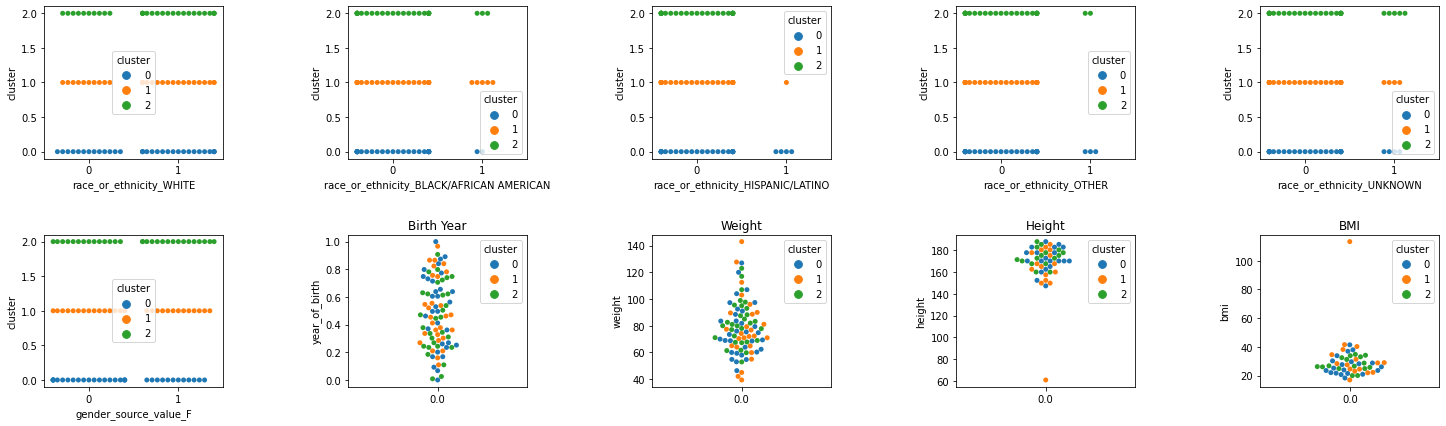

In [47]:
import matplotlib.colors as mcolors
import seaborn as sns

# Visualizing clustered data

zeros = np.zeros(len(labels['cluster']))

f, axes = plt.subplots(2, 5, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.4, wspace=0.6)




ax = sns.swarmplot(x=clustering_data['race_or_ethnicity_WHITE'], y=labels['cluster'], hue=labels['cluster'], ax=axes[0,0])
ax = sns.swarmplot(x=clustering_data['race_or_ethnicity_BLACK/AFRICAN AMERICAN'], y=labels['cluster'],
                   hue=labels['cluster'], ax=axes[0,1])
ax = sns.swarmplot(x=clustering_data['race_or_ethnicity_HISPANIC/LATINO'], y=labels['cluster'], hue=labels['cluster'], ax=axes[0,2])
ax = sns.swarmplot(x=clustering_data['race_or_ethnicity_OTHER'], y=labels['cluster'], hue=labels['cluster'], ax=axes[0,3])
ax = sns.swarmplot(x=clustering_data['race_or_ethnicity_UNKNOWN'], y=labels['cluster'], hue=labels['cluster'], ax=axes[0,4])

ax = sns.swarmplot(x=clustering_data['gender_source_value_F'], y=labels['cluster'], hue=labels['cluster'], ax=axes[1,0])

ax = sns.swarmplot(x=zeros,y=clustering_data['year_of_birth'], hue=labels['cluster'], ax=axes[1,1])
ax.set_title("Birth Year")
ax = sns.swarmplot(x=zeros,y=physical_data['weight'], hue=labels['cluster'], ax=axes[1,2])
ax.set_title("Weight")
ax = sns.swarmplot(x=zeros,y=physical_data['height'], hue=labels['cluster'], ax=axes[1,3])
ax.set_title("Height")
ax = sns.swarmplot(x=zeros,y=physical_data['bmi'], hue=labels['cluster'], ax=axes[1,4])
ax.set_title("BMI")
        
plt.close(2)
plt.close(3)
plt.show()

In [32]:
demographic_data

,person_id,year_of_birth,gender_source_value,race_or_ethnicity
0,3589912774911670296,2095,M,HISPANIC/LATINO
1,-3210373572193940939,2079,M,HISPANIC/LATINO
2,-775517641933593374,2149,M,BLACK/AFRICAN AMERICAN
3,-2575767131279873665,2050,M,BLACK/AFRICAN AMERICAN
4,-8970844422700220177,2114,M,WHITE
...,...,...,...,...
95,-7671795861352464589,2052,F,UNKNOWN
96,5734523979606454056,2069,F,UNKNOWN
97,1532249960797525190,2106,F,UNABLE TO OBTAIN
98,5894416985828315484,2055,F,UNABLE TO OBTAIN
